# `Airline Passanger Satisfaction`

# Introduction

Kepuasan pelanggan merupakan salah satu perhatian penting bagi industri penerbangan. Perjalanan udara merupakan salah satu moda yang paling nyaman untuk perjalanan jarak jauh baik di tingkat nasional maupun internasional. Ada banyak penyedia layanan penerbangan (ASP) di seluruh dunia. Dunia yang kompetitif memotivasi perusahaan penerbangan untuk menarik pelanggan. Namun, seorang penumpang mempertimbangkan beberapa poin sebelum memilih maskapai mana pun. Poin-poin ini dapat berupa kelas penerbangan, waktu perjalanan, jumlah pemberhentian, layanan dalam maskapai dan lain-lain. Oleh karena itu, penyedia jasa penerbangan berupaya untuk meningkatkan fasilitas dan kenyamanan dalam penerbangan mereka untuk menarik pelanggan melalui survey kepuasan pelanggan.

## Main Problem

Penyedia jasa penerbangan ingin mengetahui **bagaimana kepuasan pelanggan berdasarkan gender** dan **pelayanan yang dapat ditingkatkan** agar lebih menarik bagi pelanggan dalam menggunakan penyedia jasa penerbangan tersebut.

## Data

Untuk menentukan layanan terkait yang dapat diberikan kepada pelanggan, kami menganalisis data kepuasan penumpang maskapai

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

Dataset berisi survei kepuasan penumpang maskapai. Dalam proyek ini, kami berusaha menemukan fitur yang paling memengaruhi kepuasan pelanggan. 

**Content:**
* Gender: Jenis Kelamin penumpang (Wanita, Pria)
* Customer Type: Jenis pelanggan (Pelanggan setia, pelanggan *disloyal*/tidak loyal)
* Age:  Usia dari penumpang
* Type of Travel: Tujuan penerbangan penumpang (Personal Travel, Business Travel)
* Class: Kelas perjalanan di pesawat penumpang (Business, Eco, Eco Plus)
* Flight distance: Jarak penerbangan dari perjalanan
* Inflight wifi service: Tingkat kepuasan layanan wifi dalam pesawat (0:Not Applicable; 1-5)
* Departure/Arrival time convenient: Tingkat kepuasan waktu keberangkatan/kedatangan yang nyaman
* Ease of Online booking: Tingkat kepuasan booking online
* Gate location: Tingkat kepuasan lokasi gate
* Food and drink: Tingkat kepuasan makanan dan minuman
* Online boarding: Tingkat kepuasan boarding online
* Seat comfort: Tingkat kepuasan atas kenyamanan tempat duduk
* Inflight entertainment: Tingkat kepuasan hiburan dalam pesawat
* On-board service: Tingkat kepuasan layanan on-board
* Leg room service: Tingkat kepuasan layanan leg room
* Baggage handling: Tingkat kepuasan penanganan bagasi
* Check-in service: Tingkat kepuasan layanan check-in
* Inflight service: Tingkat kepuasan layanan dalam pesawat
* Cleanliness: Tingkat kepuasan Kebersihan
* Departure Delay in Minutes: Menit tertunda saat keberangkatan
* Arrival Delay in Minutes: Menit tertunda saat Kedatangan
* Satisfaction: Tingkat kepuasan maskapai (Kepuasan, netral atau ketidakpuasan)

Berikut adalah 5 baris teratas dan terbawah dari set data *kepuasan penumpang maskapai*.

In [78]:
df = pd.read_csv('airline passanger satisfaction.csv')
display(df.head(),df.tail())

Unnamed: 0      id  Gender      Customer Type  Age   Type of Travel  \
0           0   70172    Male     Loyal Customer   13  Personal Travel   
1           1    5047    Male  disloyal Customer   25  Business travel   
2           2  110028  Female     Loyal Customer   26  Business travel   
3           3   24026  Female     Loyal Customer   25  Business travel   
4           4  119299    Male     Loyal Customer   61  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0  Eco Plus              460                      3   
1  Business              235                      3   
2  Business             1142                      2   
3  Business              562                      2   
4  Business              214                      3   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  2  ...                       1   
2                                  2  ...                       5   
3                                  5  ...                       2   
4                                  3  ...                       3   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 4                 3                 4                4   
1                 1                 5                 3                1   
2                 4                 3                 4                4   
3                 2                 5                 3                1   
4                 3                 4                 4                3   

   Inflight service  Cleanliness  Departure Delay in Minutes  \
0                 5            5                          25   
1                 4            1                           1   
2                 4            5                           0   
3                 4            2                          11   
4                 3            3                           0   

   Arrival Delay in Minutes             satisfaction  
0                      18.0  neutral or dissatisfied  
1                       6.0  neutral or dissatisfied  
2                       0.0                satisfied  
3                       9.0  neutral or dissatisfied  
4                       0.0                satisfied  

[5 rows x 25 columns]

Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
103899      103899  94171  Female  disloyal Customer   23  Business travel   
103900      103900  73097    Male     Loyal Customer   49  Business travel   
103901      103901  68825    Male  disloyal Customer   30  Business travel   
103902      103902  54173  Female  disloyal Customer   22  Business travel   
103903      103903  62567    Male     Loyal Customer   27  Business travel   

           Class  Flight Distance  Inflight wifi service  \
103899       Eco              192                      2   
103900  Business             2347                      4   
103901  Business             1995                      1   
103902       Eco             1000                      1   
103903  Business             1723                      1   

        Departure/Arrival time convenient  ...  Inflight entertainment  \
103899                                  1  ...                       2   
103900                                  4  ...                       5   
103901                                  1  ...                       4   
103902                                  1  ...                       1   
103903                                  3  ...                       1   

        On-board service  Leg room service  Baggage handling  Checkin service  \
103899                 3                 1                 4                2   
103900                 5                 5                 5                5   
103901                 3                 2                 4                5   
103902                 4                 5                 1                5   
103903                 1                 1                 4                4   

        Inflight service  Cleanliness  Departure Delay in Minutes  \
103899                 3            2                           3   
103900                 5            4                           0   
103901                 5            4                           7   
103902                 4            1                           0   
103903                 3            1                           0   

        Arrival Delay in Minutes             satisfaction  
103899                       0.0  neutral or dissatisfied  
103900                       0.0                satisfied  
103901                      14.0  neutral or dissatisfied  
103902                       0.0  neutral or dissatisfied  
103903                       0.0  neutral or dissatisfied  

[5 rows x 25 columns]

## Data Understanding and Cleaning

In [79]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (103904, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type of Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight Distance                    103904 non-null  int64  
 8   Inflight wifi service              103904 non-null  int64  
 9   Departure/Arrival time convenient  103904 non-null  int64  
 10  Ease of Online booking             103904 non-n

Berdasarkan informasi data diatas, terdapat beberapa hal yang menjadi perhatian, yaitu:

* Kolom yang terkait dengan fitur `Arrival Delay in Minutes` memiliki 310 nilai yang hilang.
* Dua kolom pertama *unnamed* dan *id* tidak berguna dan tidak akan memengaruhi klasifikasi, sehingga dapat dihapus.
* Banyak kolom berisi nilai kategorikal tetapi bertipe 'objek' atau 'int64'. Sehingga jenis data tersebut dapat diganti dengan jenis khusus yang dirancang untuk menyimpan nilai kategorikal.

In [80]:
#Penghapusan 2 kolom : unnamed: 0 dan id

df = df.drop(df.iloc[:,[0, 1]], axis = 1)
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance  Inflight wifi service  \
0                   460                      3   
1                   235                      3   
2                  1142                      2   
3                   562                      2   
4                   214                      3   
...                 ...                    ...   
103899              192                      2   
103900             2347                      4   
103901             1995                      1   
103902             1000                      1   
103903             1723                      1   

        Departure/Arrival time convenient  Ease of Online booking  \
0                                       4                       3   
1                                       2                       3   
2                                       2                       2   
3                                       5                       5   
4                                       3                       3   
...                                   ...                     ...   
103899                                  1                       2   
103900                                  4                       4   
103901                                  1                       1   
103902                                  1                       1   
103903                                  3                       3   

        Gate location  ...  Inflight entertainment  On-board service  \
0                   1  ...                       5                 4   
1                   3  ...                       1                 1   
2                   2  ...                       5                 4   
3                   5  ...                       2                 2   
4                   3  ...                       3                 3   
...               ...  ...                     ...               ...   
103899              3  ...                       2                 3   
103900              4  ...                       5                 5   
103901              3  ...                       4                 3   
103902              5  ...                       1                 4   
103903              3  ...                       1                 1   

        Leg room service  Baggage handling  Checkin service  Inflight service  \
0                      3                 4                4                 5   
1                      5                 3                1                 4   
2                      3                 4                4                 4   
3                      5                 3                1                 4   
4                      4                 4                3                 3   
...                  ...               ...              ...               ...   
103899                 1                 4                2                 3   
103900                 5                 5                5                 5   
103901                 2                 4                5                 5   
103902                 5                 1                5               

## Perubahan jenis data:

In [81]:
categorical_indexes = [1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  object  
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

## Checking the missing data:

In [8]:
df.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [9]:
print(f'Persentase missing value dalam setiap kolom di dataset df:')
df.isna().sum()/df.shape[0]*100

Persentase missing value dalam setiap kolom di dataset df:


Gender                               0.000000
Customer Type                        0.000000
Age                                  0.000000
Type of Travel                       0.000000
Class                                0.000000
Flight Distance                      0.000000
Inflight wifi service                0.000000
Departure/Arrival time convenient    0.000000
Ease of Online booking               0.000000
Gate location                        0.000000
Food and drink                       0.000000
Online boarding                      0.000000
Seat comfort                         0.000000
Inflight entertainment               0.000000
On-board service                     0.000000
Leg room service                     0.000000
Baggage handling                     0.000000
Checkin service                      0.000000
Inflight service                     0.000000
Cleanliness                          0.000000
Departure Delay in Minutes           0.000000
Arrival Delay in Minutes          

## Filling the missing data:

In [26]:
fig = px.box(df['Arrival Delay in Minutes'], width=500, height=500)

fig.update_layout(
    title="Boxplot: Arrival Delay in Minutes",
    title_x=0.5,
    font_size=12
)

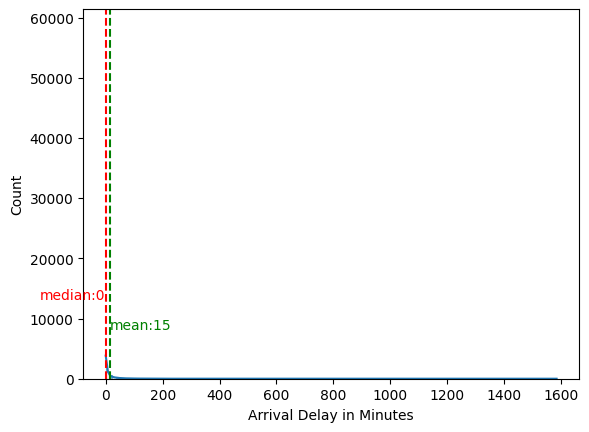

In [32]:
mean = df['Arrival Delay in Minutes'].mean()
median = df['Arrival Delay in Minutes'].median()

sns.histplot(df['Arrival Delay in Minutes'], kde=True, alpha=0.5)
plt.axvline(mean, ls='--', color='g', label='mean')
plt.axvline(median, ls='--', color='r', label='median')
plt.text(mean, 10000, f'mean:{mean:.0f}', color='g', ha='left', va='top')
plt.text(median, 15000, f'median:{median:.0f}', color='r', ha='right', va='top')
plt.show()

Dari histogram di atas, terlihat bahwa nilai keterlambatan kedatangan mengikuti distribusi right-skewed dimana mean > median.

Secara garis besar:  
* *missing value* di kolom `Arrival Delay in Minutes` memiliki proporsi yang cukup tinggi (>10%), dengan missing value di kolom `Arrival Delay in Minutes` mencapai 29.83%. 

Ada 2 cara untuk menangani *missing value*:
1. menghapus baris/kolom yang berisi *missing value*. Cara ini tidak disarankan dalam kasus berikut, karena jumlah missing value yang tergolong cukup tinggi mencapai 29%.
2. mengisi data yang hilang. Cara ini lebih disarankan. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan angka *median* berdasarkan boxplot dan histogram, karena data tidak terdistribusi normal.

In [10]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(), inplace=True)

In [11]:
#pengecekan kembali jumlah kolom dan baris data setelah handling missing value

df.shape

(103904, 23)

## Check for duplicate data:

In [12]:
print(f'Jumlah data duplikat di dataset df:')
df.duplicated().sum()

Jumlah data duplikat di dataset df:


0

## Check for unique data:

In [52]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1 = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1

Column Name  Number of Unique  \
0   Gender                             2                  
1   Customer Type                      2                  
2   Age                                75                 
3   Type of Travel                     2                  
4   Class                              3                  
5   Flight Distance                    3802               
6   Inflight wifi service              6                  
7   Departure/Arrival time convenient  6                  
8   Ease of Online booking             6                  
9   Gate location                      6                  
10  Food and drink                     6                  
11  Online boarding                    6                  
12  Seat comfort                       6                  
13  Inflight entertainment             6                  
14  On-board service                   6                  
15  Leg room service                   6                  
16  Baggage handling                   5                  
17  Checkin service                    6                  
18  Inflight service                   6                  
19  Cleanliness                        6                  
20  Departure Delay in Minutes         446                
21  Arrival Delay in Minutes           455                
22  satisfaction                       2                  

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     Unique Sample  
0   ['Male', 'Female']
Categories (2, object): ['Female', 'Male']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
1   ['Loyal Customer', 'disloyal Customer']
Categories (2, object): ['Loyal Customer', 'disloyal Customer']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         
2   [13, 25, 26, 61, 47, 52, 41, 20, 24, 12, 53, 33, 45, 38, 9, 17, 43, 58, 23, 57, 49, 36, 22, 31, 15, 35, 67, 37, 40, 34, 39, 50, 29, 54, 21, 28, 27, 69, 60, 48, 59, 46, 30, 66, 64, 44, 51, 32, 19, 42, 16, 11, 62, 8, 56, 68, 55, 18, 65, 72, 70, 63, 10, 7, 14, 80, 74, 71, 85, 73, 76, 77, 75, 79, 78]                                                                                                                                                                                                                                                                                                                                       
3   ['Personal Travel', 'Business travel']
Categories (2, object): ['Business travel', 'Perso

## Check data outliers

Sebelum menangani data yang *outlier*, dapat dilakukan pengecekan sebaran data melalui heatmap

<AxesSubplot: >

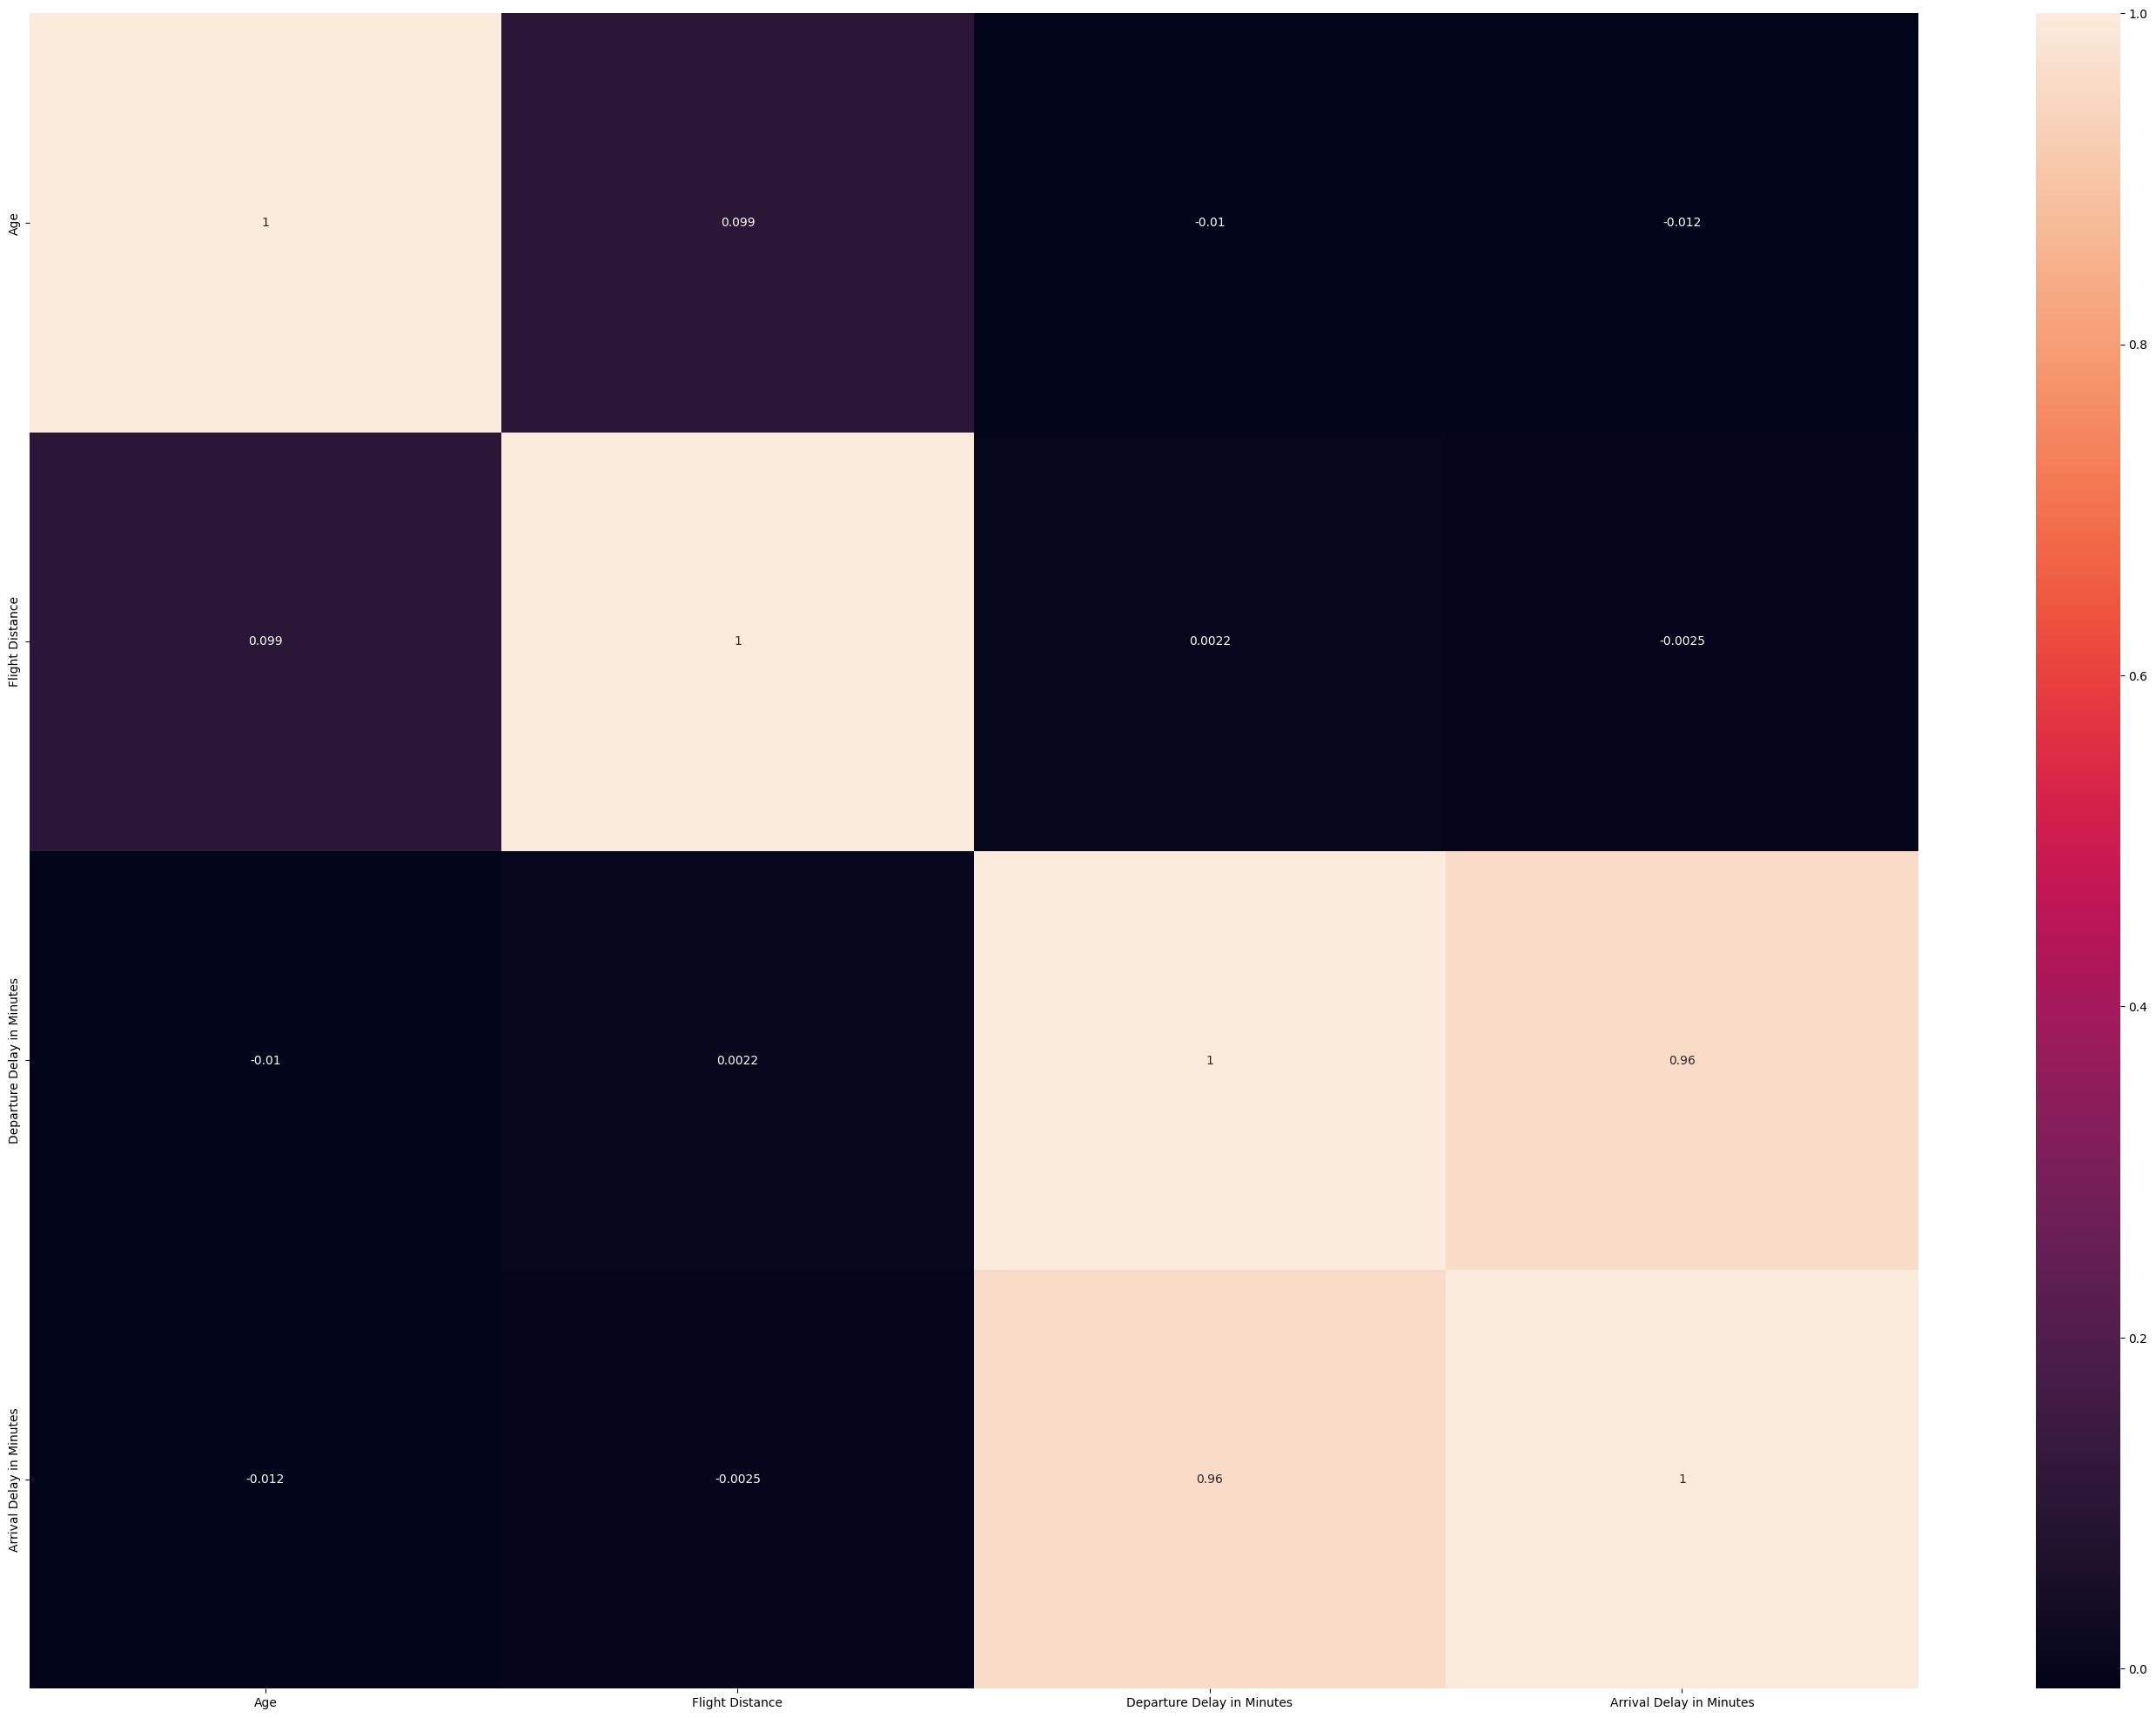

In [53]:
plt.figure(figsize=(35,25))
sns.heatmap(df.corr(), annot=True)

array([[<AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Flight Distance'}>],
       [<AxesSubplot: title={'center': 'Departure Delay in Minutes'}>,
        <AxesSubplot: title={'center': 'Arrival Delay in Minutes'}>]],
      dtype=object)

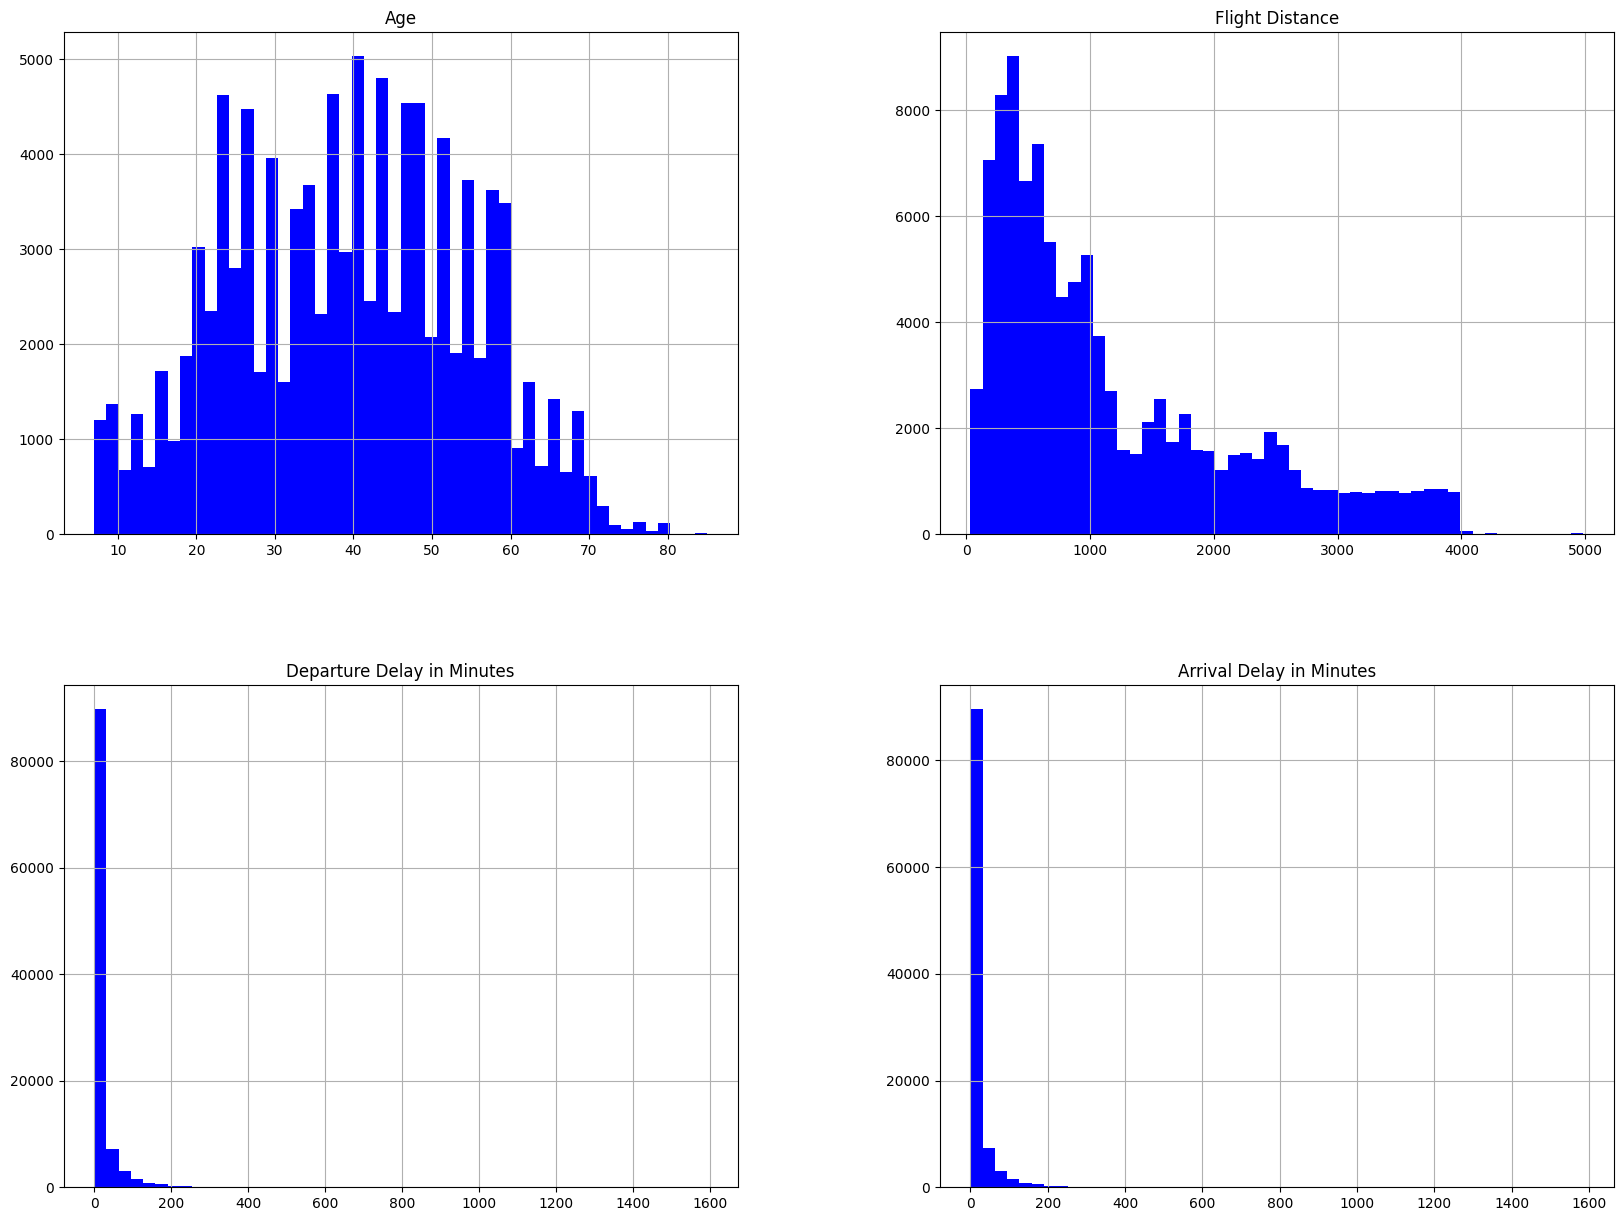

In [54]:
df.hist(bins=50, figsize=(20,15), color='blue')

In [49]:
def outlier(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    iqr=q3-q1
    b_bawah=q1-1.5*iqr
    b_atas=q3+1.5*iqr
    return df.loc[(df<b_bawah)|(df>b_atas)]

print(f'Jumlah outlier pada variabel Age : ')
outlier(df['Age']).count()

Jumlah outlier pada variabel Age : 


0

<AxesSubplot: xlabel='Flight Distance', ylabel='satisfaction'>

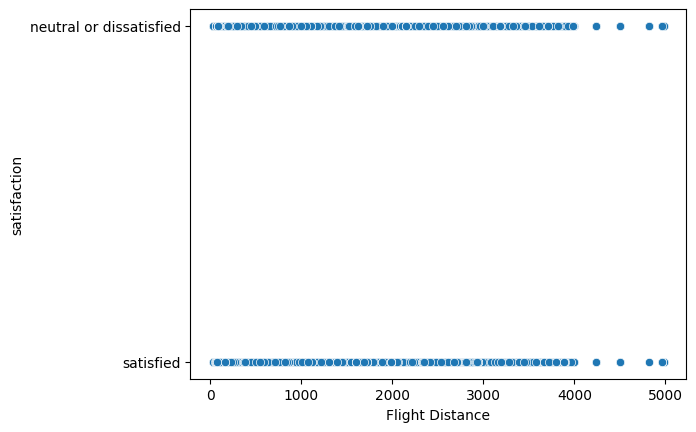

In [62]:
sns.scatterplot(x= df['Flight Distance'] , y = df['satisfaction'])

In [81]:
df[df['Flight Distance']>=4000].shape

(69, 23)

In [82]:
print(f'Jumlah outlier pada variabel Flight Distance : 69')


Jumlah outlier pada variabel Flight Distance : 69


In [13]:
df=df[df['Flight Distance']<4000]

<AxesSubplot: xlabel='Departure Delay in Minutes', ylabel='satisfaction'>

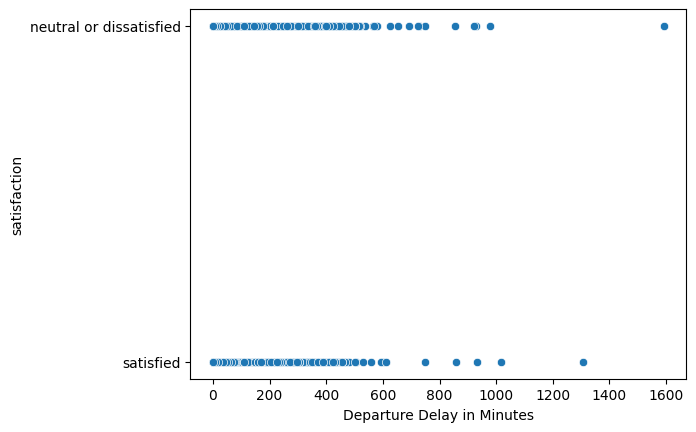

In [14]:
sns.scatterplot(x= df['Departure Delay in Minutes'] , y = df['satisfaction'])

In [15]:
df[df['Departure Delay in Minutes']>=600].shape

(19, 23)

In [16]:
print(f'Jumlah outlier pada variabel Departure Delay in Minutes : 19')

Jumlah outlier pada variabel Departure Delay in Minutes : 19


In [17]:
df=df[df['Departure Delay in Minutes']<600]

<AxesSubplot: xlabel='Arrival Delay in Minutes', ylabel='satisfaction'>

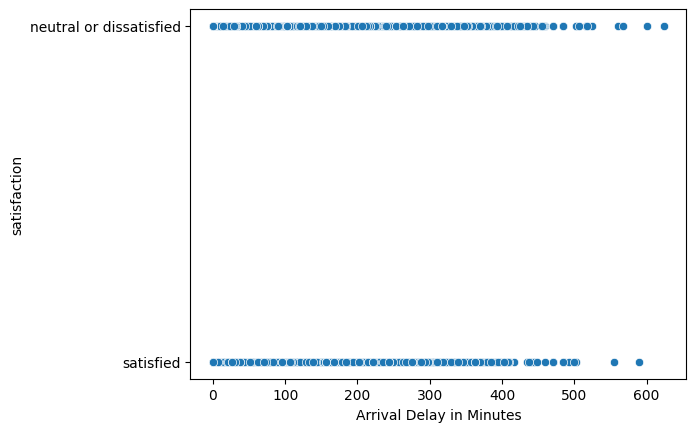

In [18]:
sns.scatterplot(x= df['Arrival Delay in Minutes'] , y = df['satisfaction'])

In [87]:
df[df['Arrival Delay in Minutes']>=400].shape

(89, 23)

In [19]:
print(f'Jumlah outlier pada variabel Arrival Delay in Minutes : 89 ')

Jumlah outlier pada variabel Arrival Delay in Minutes : 89 


In [20]:
df=df[df['Arrival Delay in Minutes']<400]

In [21]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')

Jumlah baris dan kolom di dataset df adalah (103746, 23)


In [22]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(103746, 23)


dataFeatures  dataType  null  unique  \
0                              Gender  category     0       2   
1                       Customer Type  category     0       2   
2                                 Age     int64     0      75   
3                      Type of Travel  category     0       2   
4                               Class  category     0       3   
5                     Flight Distance     int64     0    3796   
6               Inflight wifi service  category     0       6   
7   Departure/Arrival time convenient  category     0       6   
8              Ease of Online booking  category     0       6   
9                       Gate location  category     0       6   
10                     Food and drink  category     0       6   
11                    Online boarding  category     0       6   
12                       Seat comfort  category     0       6   
13             Inflight entertainment  category     0       6   
14                   On-board service  category     0       6   
15                   Leg room service  category     0       6   
16                   Baggage handling  category     0       5   
17                    Checkin service  category     0       6   
18                   Inflight service  category     0       6   
19                        Cleanliness  category     0       6   
20         Departure Delay in Minutes     int64     0     379   
21           Arrival Delay in Minutes   float64     0     381   
22                       satisfaction    object     0       2   

                            uniqueSample  
0                         [Male, Female]  
1    [Loyal Customer, disloyal Customer]  
2                               [66, 77]  
3     [Personal Travel, Business travel]  
4                        [Business, Eco]  
5                           [3548, 1527]  
6                                 [4, 2]  
7                                 [1, 5]  
8                                 [1, 3]  
9                                 [4, 3]  
10                                [2, 3]  
11                                [0, 5]  
12                                [5, 0]  
13                                [0, 5]  
14                                [2, 3]  
15                                [2, 1]  
16                                [2, 3]  
17                                [4, 3]  
18                                [4, 1]  
19                                [5, 2]  
20                            [317, 276]  
21                           [96.0, 5.0]  
22  [neutral or dissatisfied, satisfied]

Sebelum dibersihkan, data set df memiliki 103,904 baris data dan 24 kolom, dengan terdapat 310 data yang kosong. Setelah dilakukan pengisian data kosong dengan nilai median yang dirasa relevan dan menghilangkan kolom yang tidak relevan, data menjadi terdiri dari 23 kolom dan 103,746 baris data.

## Data Analysis

In [23]:
display(df.describe(), df.describe(include='object'))

Age  Flight Distance  Departure Delay in Minutes  \
count  103746.000000    103746.000000               103746.000000   
mean       39.384651      1187.133759                   14.373643   
std        15.115581       993.723120                   34.596733   
min         7.000000        31.000000                    0.000000   
25%        27.000000       414.000000                    0.000000   
50%        40.000000       842.000000                    0.000000   
75%        51.000000      1739.000000                   12.000000   
max        85.000000      3999.000000                  455.000000   

       Arrival Delay in Minutes  
count             103746.000000  
mean                  14.684075  
std                   35.009639  
min                    0.000000  
25%                    0.000000  
50%                    0.000000  
75%                   13.000000  
max                  399.000000

satisfaction
count                    103746
unique                        2
top     neutral or dissatisfied
freq                      58796

In [24]:
print ('-'*60,'Skewness Data','-'*60)
display(df.skew(axis=0))
print ('''
Nilai Skew Yang Positif = Right Skewed
Nilai Skew Yang Negatif = Left Skewed
''')

------------------------------------------------------------ Skewness Data ------------------------------------------------------------


Age                          -0.004567
Flight Distance               1.102193
Departure Delay in Minutes    4.396855
Arrival Delay in Minutes      4.376536
dtype: float64


Nilai Skew Yang Positif = Right Skewed
Nilai Skew Yang Negatif = Left Skewed



------------------------------------------------------------ Customer Satisfaction ------------------------------------------------------------


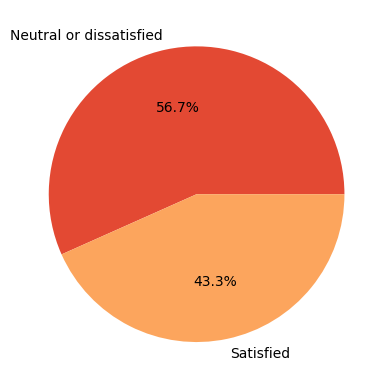

In [25]:
print ('-'*60,'Customer Satisfaction','-'*60)
plt.pie(df.satisfaction.value_counts(), labels = ["Neutral or dissatisfied", "Satisfied"], colors = sns.color_palette("RdYlGn"), autopct = '%1.1f%%')
pass

In [28]:
pip install Jinja2

     -------------------------------------- 133.1/133.1 kB 2.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
print ('-'*60,'Correlation between Variable','-'*60)
corr_mat = df.corr()
corr_mat.style.background_gradient(cmap='GnBu')

------------------------------------------------------------ Correlation between Variable ------------------------------------------------------------


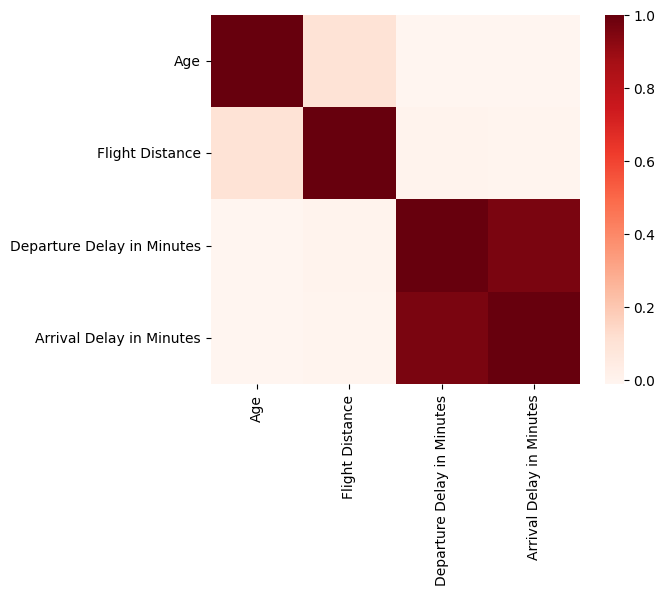

In [71]:
sns.heatmap(corr_mat, square = True, cmap = 'Reds')
pass

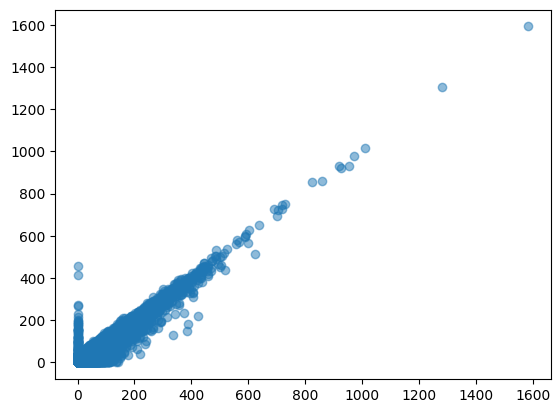

In [80]:
plt.scatter(df['Arrival Delay in Minutes'], df['Departure Delay in Minutes'], alpha = 0.5)
pass

In [79]:
print ('-'*25,'Correlation between Arrival Delay in Minutes and Departure Delay in Minutes','-'*25)

corr_mat.where(np.triu(corr_mat > 0.5, k=1)).stack().sort_values(ascending = False)

------------------------- Correlation between Arrival Delay in Minutes and Departure Delay in Minutes -------------------------


Departure Delay in Minutes  Arrival Delay in Minutes    0.960247
dtype: float64

Berdasarkan analisa korelasi antara `Arrival Delay in Minutes` dan `Departure Delay in Minutes` terlihat bahwa titik-titik tersebut berbaris kurang lebih sepanjang garis lurus dari sudut kiri bawah ke kanan atas. Jadi, dalam beberapa perkiraan <b>hubungan penundaan waktu kedatangan pada penundaan waktu keberangkatan bersifat linear</b>. Hal ini berarti, jika penerbangan pelanggan maskapai ditunda selama waktu tertentu saat keberangkatan, maka penerbangan akan ditunda dengan jumlah waktu yang sama saat mendarat (dengan asumsi pesawat tidak berakselerasi dalam penerbangan untuk mengganti waktu yang hilang).

In [55]:
from scipy.stats import normaltest
stats, pval=normaltest(df['Age'])
if pval<=0.05:
    print('Data terdistribusi tidak normal') #Ha
else: 
    print('Data terdistribusi normal') #Ho 

Data terdistribusi tidak normal


In [56]:
# uji statistik, apakah ada perbedaan satisfaction antara usia penumpang
# karena distribusi data tidak normal, gunakan mann whitney
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df[df['satisfaction']==i]['Age'] for i in df['satisfaction'].unique()], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Berdasarkan uji statistik, terdapat perbedaan kepuasan pelanggan yang signifikan antara usia penumpang.

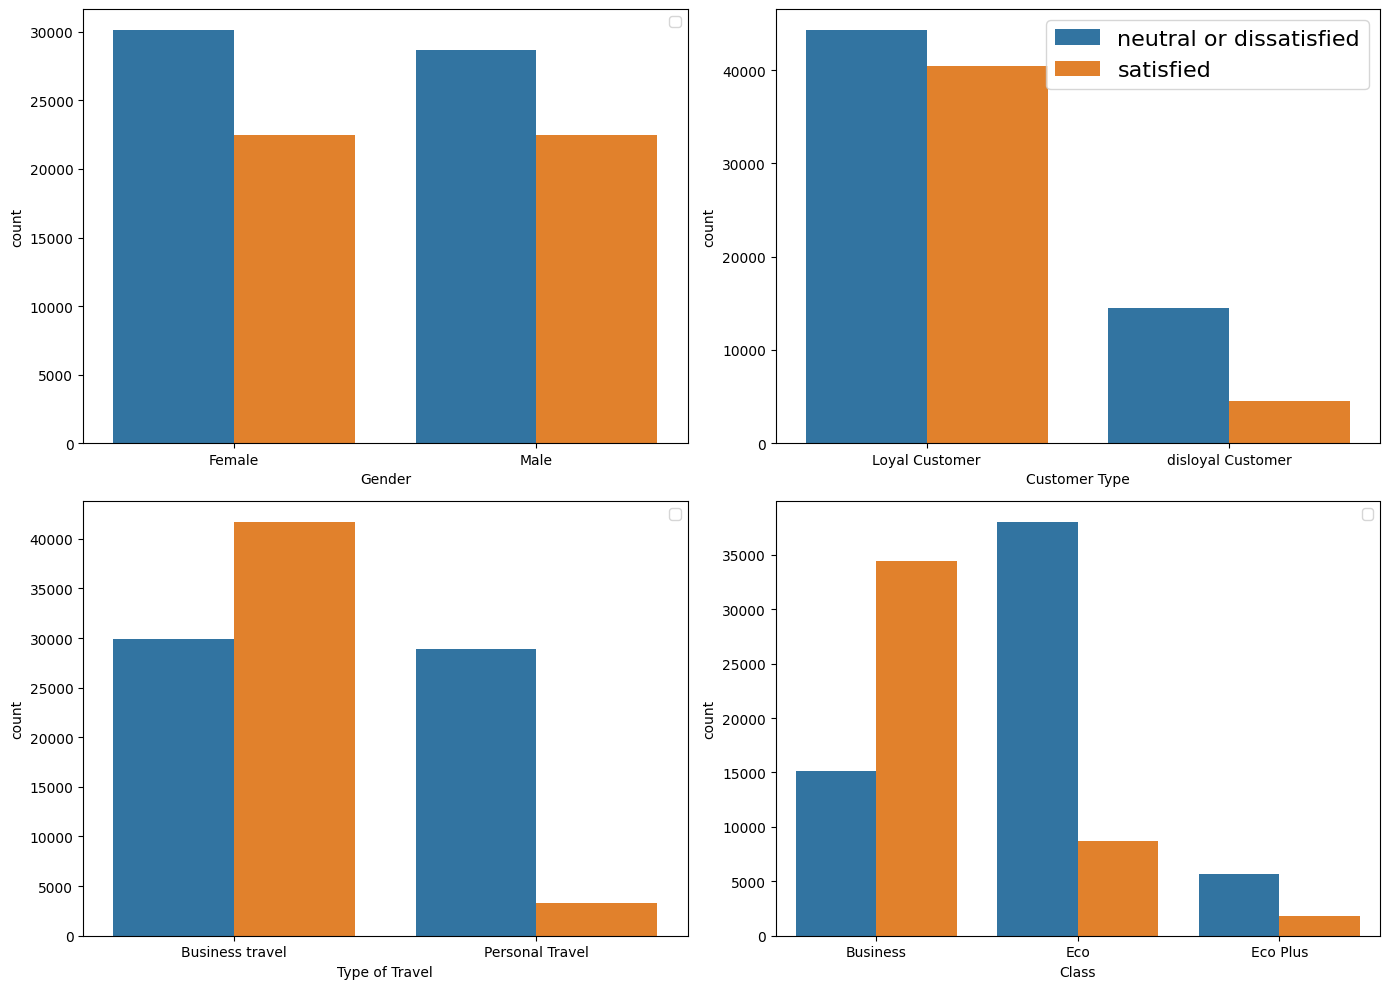

In [57]:
cat_cols = ['Gender', 'Customer Type', 'Type of Travel', 'Class']

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
axs = axs.ravel()

i=0
for col in cat_cols:
    
    # define location
    plt.subplot(2, 2, i+1)
    
    # create plot
    ax = plt.gca()
    axs[i] = sns.countplot(x = col, hue = 'satisfaction', data = df)
    
    # remove legend
    ax.legend('')
    
    i += 1

# add legend
axs[1].legend(loc='upper right', fontsize=16)

plt.tight_layout()
plt.show()

Berdasarkan analisa kepuasan pelanggan, terdapat beberapa hal menarik yaitu:
- Pelanggan laki-laki dan perempuan memiliki tingkat kepuasan yang sama.
- Pelanggan yang *disloyal* lebih banyak yang tidak puas dibandingkan dengan pelanggan yang loyal.
- Perjalanan pribadi lebih tidak memuaskan dibandingkan dengan perjalanan bisnis.
- Kelas Eco lebih tidak puas dibandingkan dengan kelas bisnis.

In [97]:
df.loc[df['Age']<18, 'Demograph'] = 'children'
df.loc[df['Age'].between(18,25), 'Demograph'] = 'young adult'
df.loc[df['Age'].between(26,55), 'Demograph'] = 'adult'
df.loc[df['Age']>55, 'Demograph'] = 'retired'
df

Gender      Customer Type  Age   Type of Travel     Class  \
0         Male     Loyal Customer   13  Personal Travel  Eco Plus   
1         Male  disloyal Customer   25  Business travel  Business   
2       Female     Loyal Customer   26  Business travel  Business   
3       Female     Loyal Customer   25  Business travel  Business   
4         Male     Loyal Customer   61  Business travel  Business   
...        ...                ...  ...              ...       ...   
103899  Female  disloyal Customer   23  Business travel       Eco   
103900    Male     Loyal Customer   49  Business travel  Business   
103901    Male  disloyal Customer   30  Business travel  Business   
103902  Female  disloyal Customer   22  Business travel       Eco   
103903    Male     Loyal Customer   27  Business travel  Business   

        Flight Distance Inflight wifi service  \
0                   460                     3   
1                   235                     3   
2                  1142                     2   
3                   562                     2   
4                   214                     3   
...                 ...                   ...   
103899              192                     2   
103900             2347                     4   
103901             1995                     1   
103902             1000                     1   
103903             1723                     1   

       Departure/Arrival time convenient Ease of Online booking Gate location  \
0                                      4                      3             1   
1                                      2                      3             3   
2                                      2                      2             2   
3                                      5                      5             5   
4                                      3                      3             3   
...                                  ...                    ...           ...   
103899                                 1                      2             3   
103900                                 4                      4             4   
103901                                 1                      1             3   
103902                                 1                      1             5   
103903                                 3                      3             3   

        ... On-board service Leg room service Baggage handling  \
0       ...                4                3                4   
1       ...                1                5                3   
2       ...                4                3                4   
3       ...                2                5                3   
4       ...                3                4                4   
...     ...              ...              ...              ...   
103899  ...                3                1                4   
103900  ...                5                5                5   
103901  ...                3                2                4   
103902  ...                4                5                1   
103903  ...                1                1                4   

       Checkin service Inflight service Cleanliness  \
0                    4                5           5   
1                    1                4           1   
2                    4                4           5   
3                    1                4           2   
4                    3                3           3   
...                ...              ...         ...   
103899               2                3           2   
103900               5                5           4   
103901               5                5           4   
103902               5                4           1   
103903               4                3           1   

       Departure Delay in Minutes Arrival Delay in Minutes  \
0                              25                     18.0   
1                               1      

In [98]:
pd.crosstab(df['Demograph'],df['satisfaction'], normalize='index').round(4)*100

satisfaction  neutral or dissatisfied  satisfied
Demograph                                       
adult                           50.38      49.62
children                        83.61      16.39
retired                         60.20      39.80
young adult                     65.60      34.40

In [87]:
df['Gender'].value_counts()
print(f'Jumlah Gender laki-laki : ')
print(df['Gender'].value_counts()['Male']) 
print(f'Jumlah Gender perempuan : ')
print(df['Gender'].value_counts()['Female'])

Jumlah Gender laki-laki : 
51177
Jumlah Gender perempuan : 
52727


In [90]:
pd.crosstab(df['Gender'],df['satisfaction'], normalize='index').round(4)*100

satisfaction  neutral or dissatisfied  satisfied
Gender                                          
Female                          57.26      42.74
Male                            56.05      43.95

In [100]:
pd.crosstab(df['Class'],df['satisfaction'], normalize='index').round(4)*100

satisfaction  neutral or dissatisfied  satisfied
Class                                           
Business                        30.57      69.43
Eco                             81.39      18.61
Eco Plus                        75.39      24.61

In [102]:
pd.crosstab(df['Customer Type'],df['satisfaction'], normalize='index').round(4)*100

satisfaction       neutral or dissatisfied  satisfied
Customer Type                                        
Loyal Customer                       52.27      47.73
disloyal Customer                    76.33      23.67

In [103]:
pd.crosstab(df['Type of Travel'],df['satisfaction'], normalize='index').round(4)*100

satisfaction     neutral or dissatisfied  satisfied
Type of Travel                                     
Business travel                    41.74      58.26
Personal Travel                    89.83      10.17

## Data Visualization

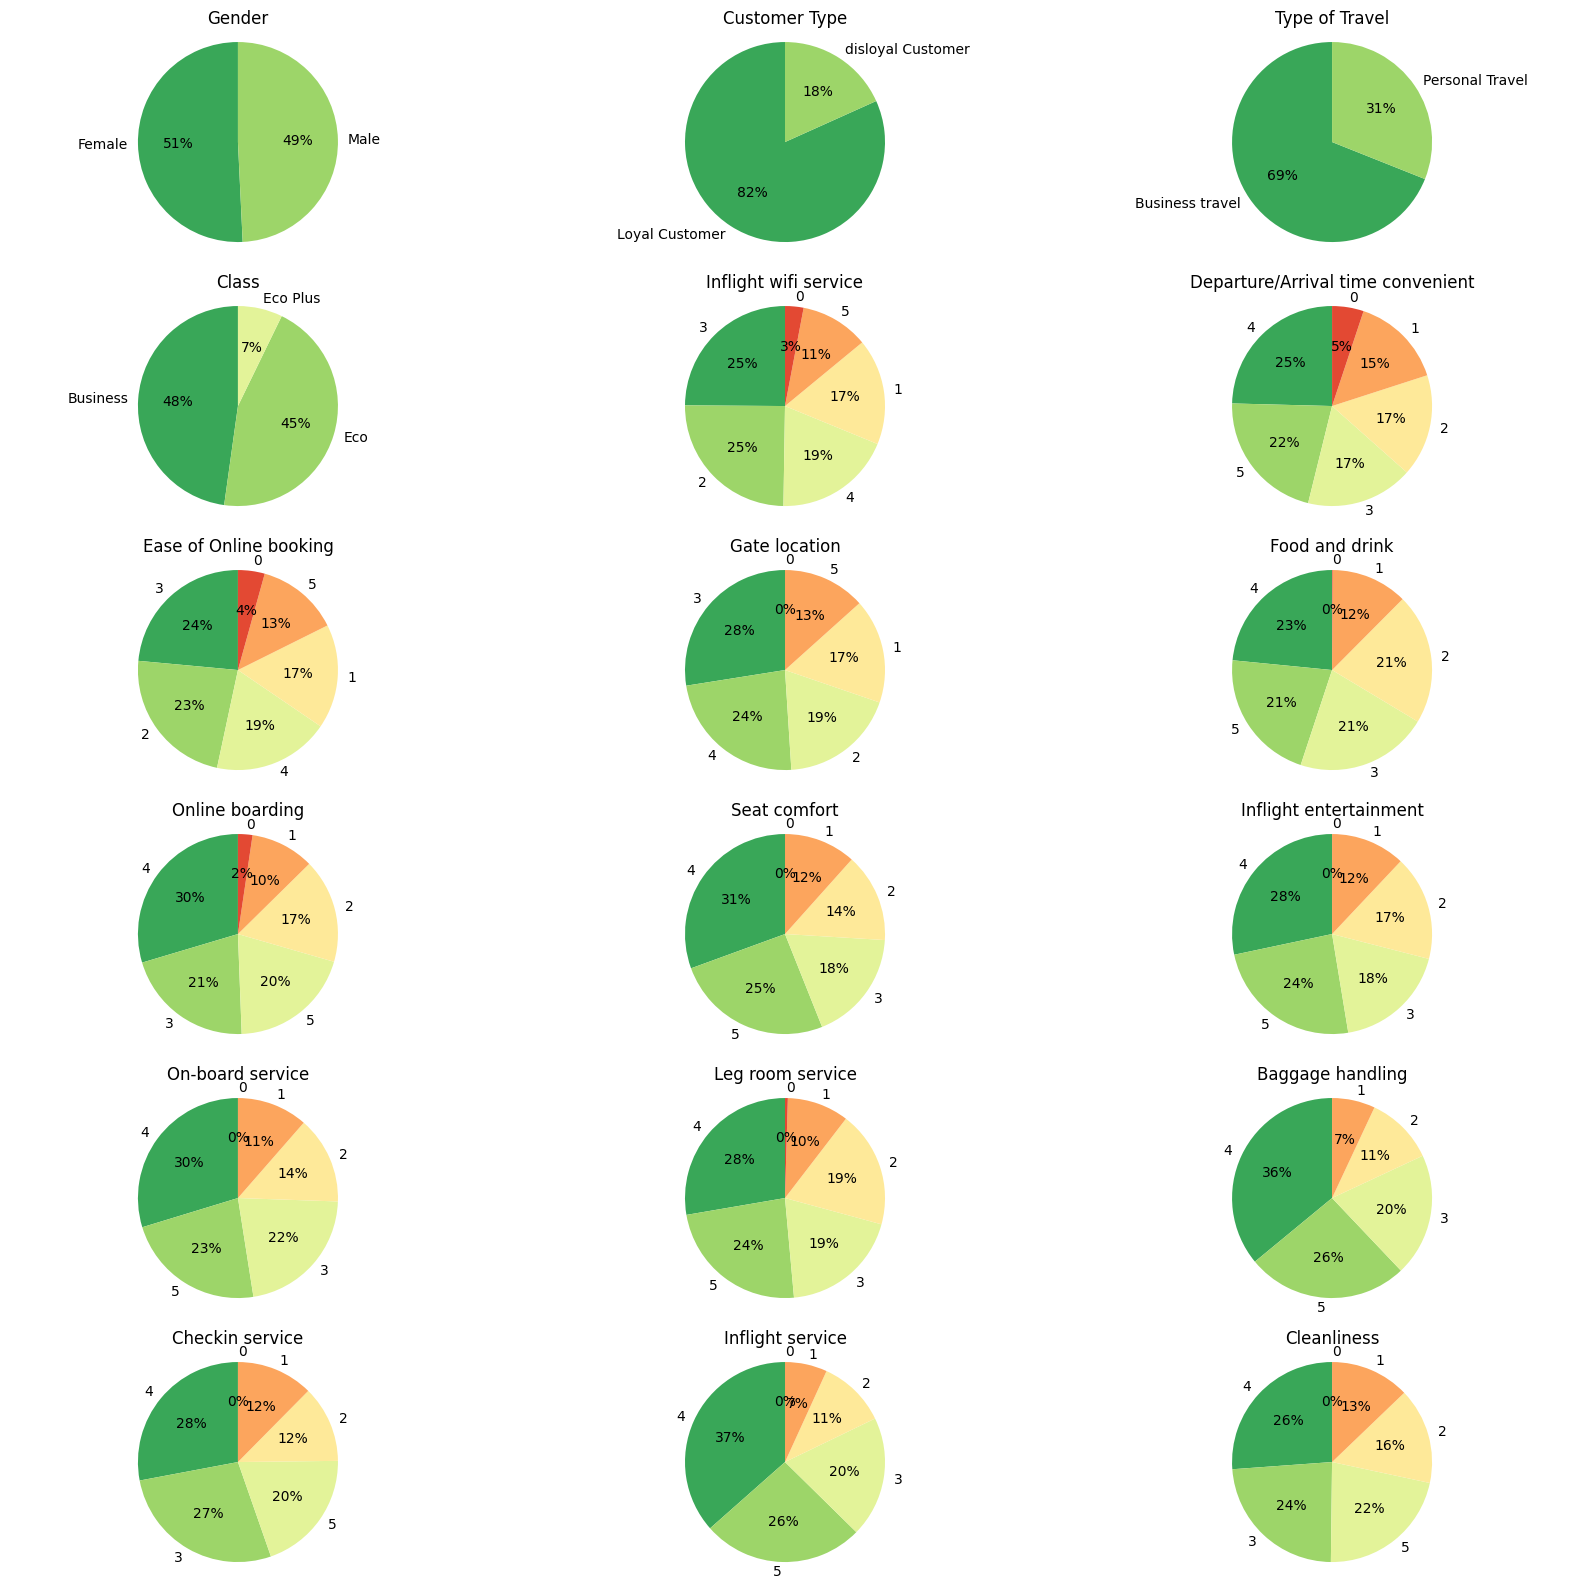

In [32]:
categ = df.iloc[:,categorical_indexes]
fig, axes = plt.subplots(6, 3, figsize = (20, 20))
for i, col in enumerate(categ):
    column_values = df[col].value_counts()
    labels = column_values.index
    sizes = column_values.values
    axes[i//3, i%3].pie(sizes, labels = labels, colors = sns.color_palette("RdYlGn_r"), autopct = '%1.0f%%', startangle = 90)
    axes[i//3, i%3].axis('equal')
    axes[i//3, i%3].set_title(col)
plt.show()

Berdasarkan data, diperoleh informasi seperti berikut:
* Jumlah penumpang pria dan wanita memiliki proporsi yang hampir sama.
* Maskapai memiliki banyak pelanggan *loyal*.
* Penggunaan maskapi lebih banyak untuk perjalanan bisnis dibandingkan dengan perjalanan pribadi.
* Kelas penerbangan Bisnis dan Ekonomi adalah dua kelas yang paling populer.
* Penumpang memiliki tinjauan yang beragam mengenai sebagian besar fasilitas yang disediakan oleh maskapai

In [92]:
fig = px.sunburst(df, path=['Gender', 'Type of Travel','Class', 'Customer Type', 'satisfaction'],color_continuous_scale='RdBu')
fig.show()

In [101]:
fig = px.sunburst(df, path=['Class','Demograph','satisfaction'],color_continuous_scale='RdBu')
fig.show()

In [99]:
fig = px.sunburst(df, path=['Gender','Demograph','satisfaction'],color_continuous_scale='RdBu')
fig.show()

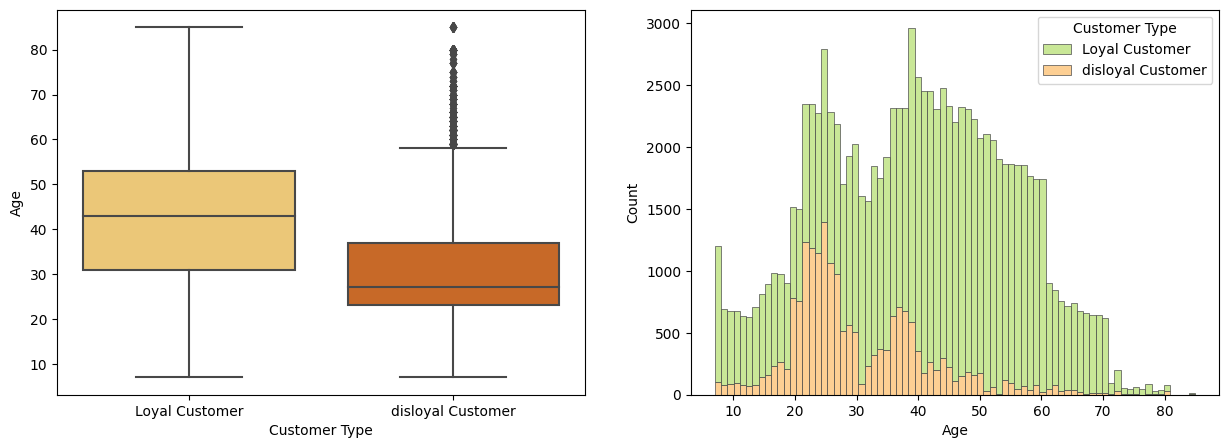

In [34]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Customer Type", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Customer Type", multiple = "stack", palette = "RdYlGn_r", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Dari diagram boxplot, diketahui bahwa <b>sebagian besar pelanggan loyal maskapai berusia antara 30 dan 50 tahun (usia rata-rata mereka sedikit di atas 40 tahun)</b>. Rentang usia pelanggan disloyal sedikit lebih kecil (rata-rata dari 25 hingga 40 tahun - sedikit kurang dari 30).

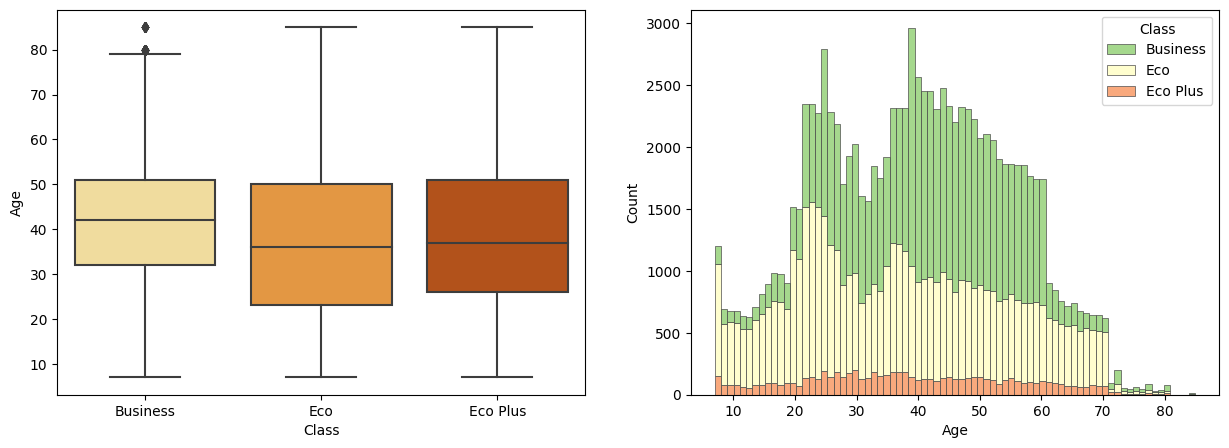

In [35]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Age", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "Age", hue = "Class", multiple = "stack", palette = "RdYlGn_r", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Pelanggan yang melaksanakan perjalanan dengan kelas bisnis memiliki rentang usia yang sama dengan pelanggan *loyal* yaitu pada usia 30-50 tahun. Berdasarkan pengamatan ini, dapat diasumsikan bahwa <b>pelanggan yang loyal pada umumnya membeli kelas bisnis untuk perjalanan udara</b

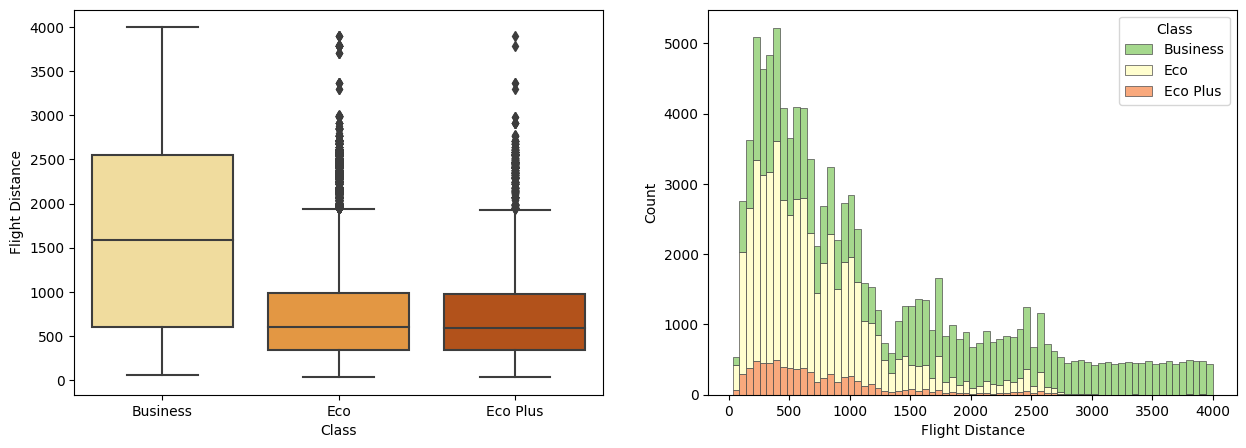

In [36]:
f, ax = plt.subplots(1, 2, figsize = (15,5))
sns.boxplot(x = "Class", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0])
sns.histplot(df, x = "Flight Distance", hue = "Class", multiple = "stack", palette = "RdYlGn_r", edgecolor = ".3", linewidth = .5, ax = ax[1])
pass

Jika dilihat dari jenis penerbangan dan jarak penerbangan, dapat ditarik kesimpulan sebagai berikut: <b>pelanggan yang jarak penerbangannya jauh, kebanyakan terbang dengan kelas bisnis</b>

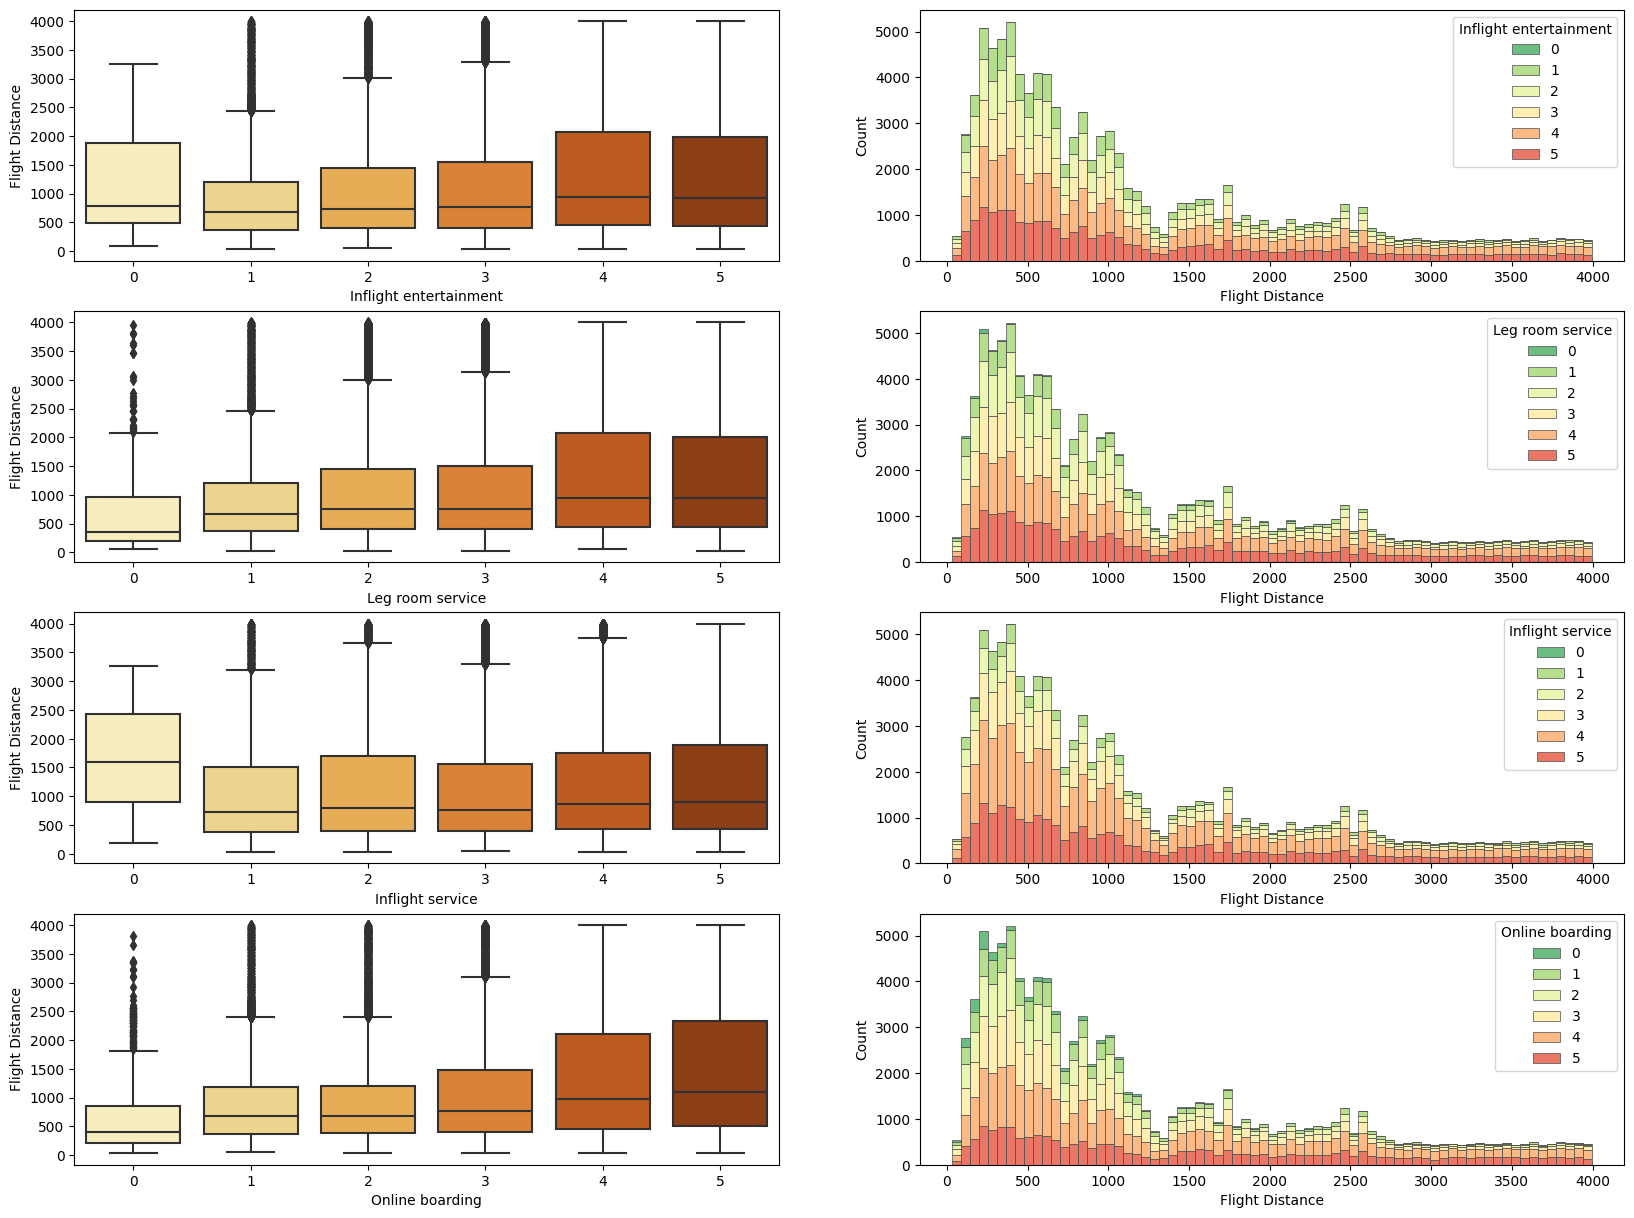

In [51]:
f, ax = plt.subplots(4, 2, figsize = (20,15))
sns.boxplot(x = "Inflight entertainment", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[0, 0])
sns.histplot(df, x = "Flight Distance", hue = "Inflight entertainment", multiple = "stack", palette = "RdYlGn_r", edgecolor = ".3", linewidth = .5, ax = ax[0, 1])
sns.boxplot(x = "Leg room service", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[1, 0])
sns.histplot(df, x = "Flight Distance", hue = "Leg room service", multiple = "stack", palette = "RdYlGn_r", edgecolor = ".3", linewidth = .5, ax = ax[1, 1])
sns.boxplot(x = "Inflight service", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[2, 0])
sns.histplot(df, x = "Flight Distance", hue = "Inflight service", multiple = "stack", palette = "RdYlGn_r", edgecolor = ".3", linewidth = .5, ax = ax[2, 1])
sns.boxplot(x = "Online boarding", y = "Flight Distance", palette = "YlOrBr", data = df, ax = ax[3, 0])
sns.histplot(df, x = "Flight Distance", hue = "Online boarding", multiple = "stack", palette = "RdYlGn_r", edgecolor = ".3", linewidth = .5, ax = ax[3, 1])
pass

Berdasarkan fasilitas yang ditawarkan oleh pihak penerbangan, dapat diperoleh pola bahwa penumpang yang memberikan nilai puas (4-5) terhadap fasilitas maskapai adalah penumpang yang melaksanakan penerbangan dengan jarak yang jauh. Sementara jenis layanan yang lebih cenderung diminati oleh penumpang adalah: fasilitas online boarding, inflight entertainment, inflight service, dan leg room service.

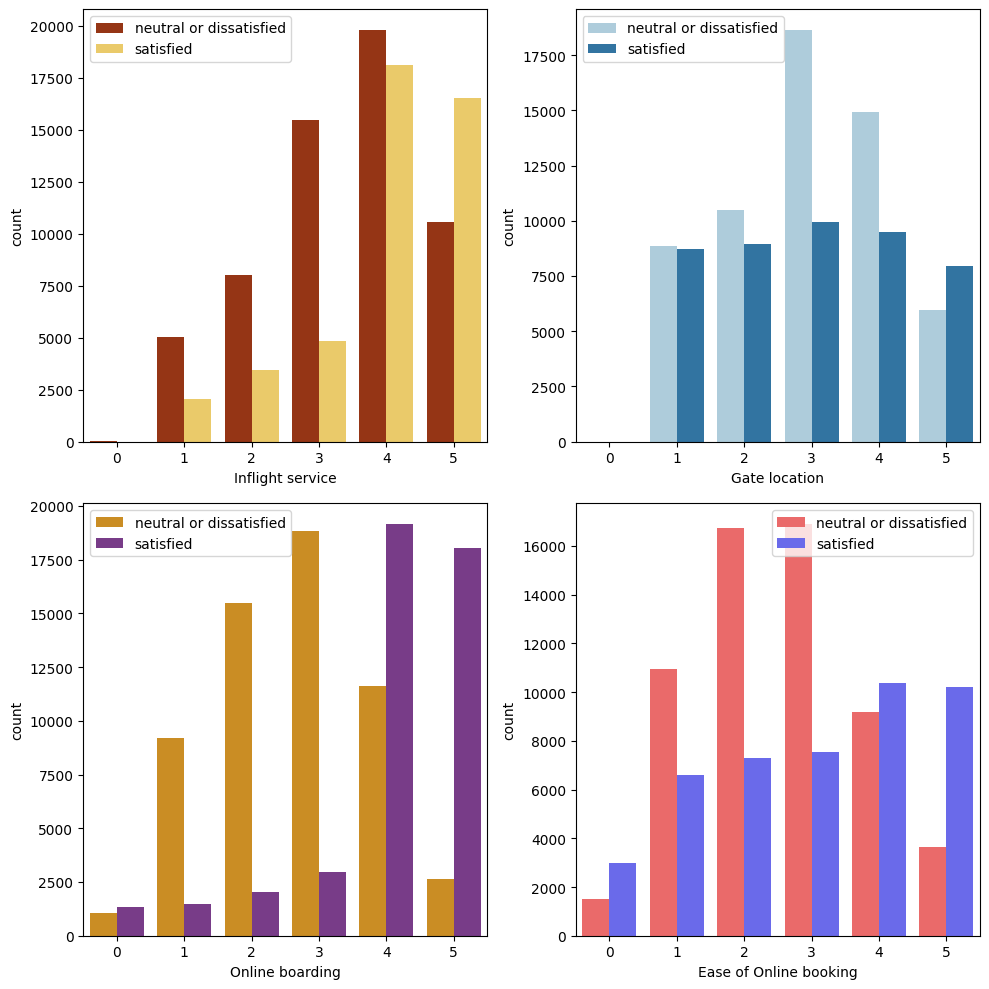

In [111]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x="Inflight service" , hue="satisfaction", palette="afmhot")
plt.legend()

plt.subplot(2,2,2)
sns.countplot(data=df, x="Gate location" , hue="satisfaction", palette="Paired")
plt.legend()

plt.subplot(2,2,3)
sns.countplot(data=df, x="Online boarding" , hue="satisfaction", palette="CMRmap_r")
plt.legend()

plt.subplot(2,2,4)
sns.countplot(data=df, x="Ease of Online booking" , hue="satisfaction", palette="seismic_r")
plt.legend()
plt.tight_layout()
plt.show()

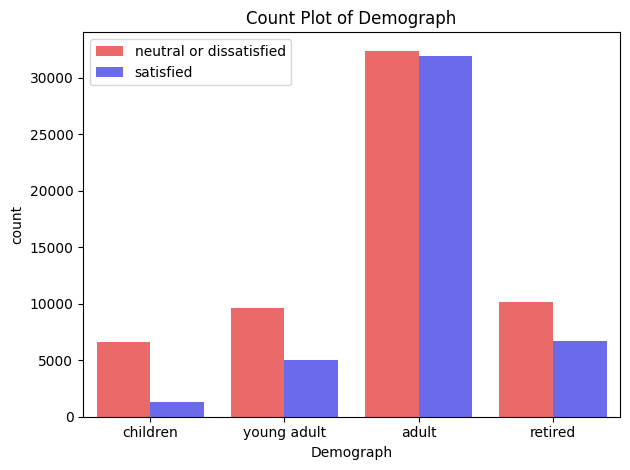

In [105]:
sns.countplot(data=df, x="Demograph" , hue="satisfaction", palette="seismic_r")
plt.title("Count Plot of Demograph")
plt.legend()
plt.tight_layout()
plt.show()

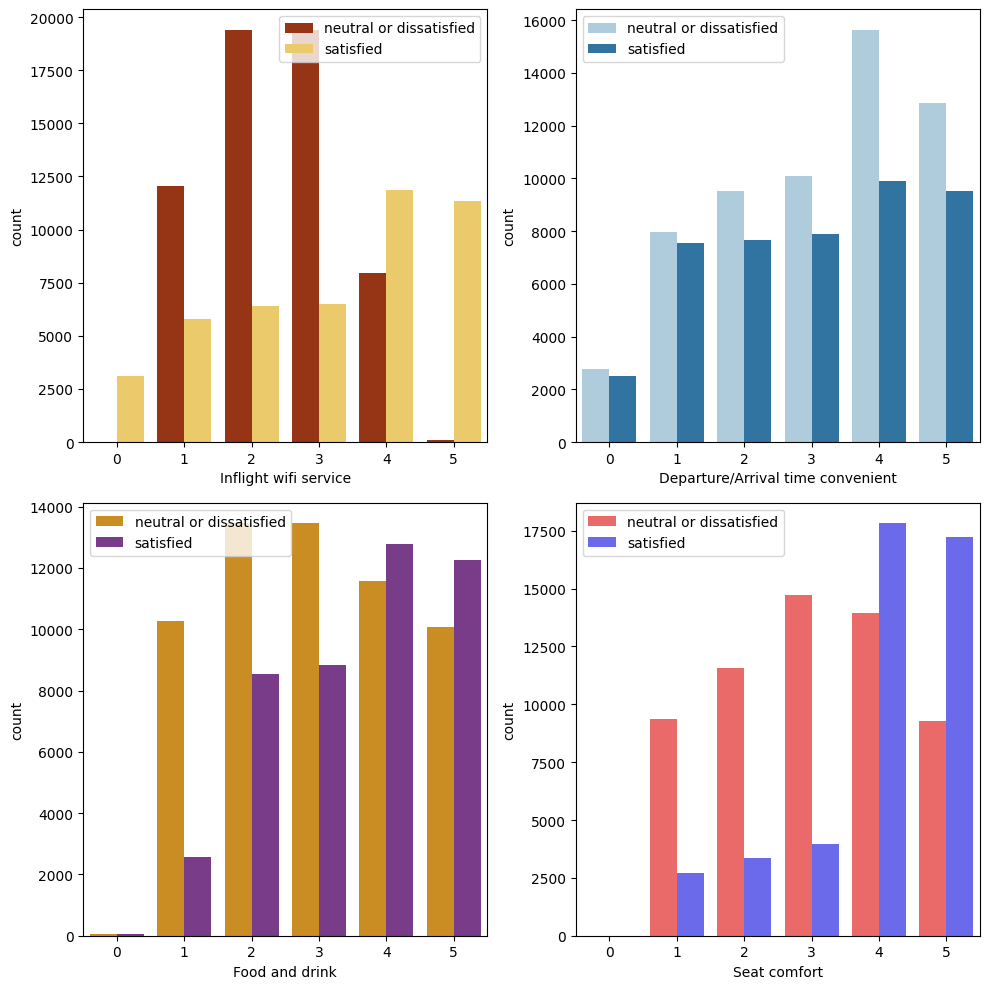

In [112]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x="Inflight wifi service" , hue="satisfaction", palette="afmhot")
plt.legend()

plt.subplot(2,2,2)
sns.countplot(data=df, x="Departure/Arrival time convenient" , hue="satisfaction", palette="Paired")
plt.legend()

plt.subplot(2,2,3)
sns.countplot(data=df, x="Food and drink" , hue="satisfaction", palette="CMRmap_r")
plt.legend()

plt.subplot(2,2,4)
sns.countplot(data=df, x="Seat comfort" , hue="satisfaction", palette="seismic_r")
plt.legend()
plt.tight_layout()
plt.show()

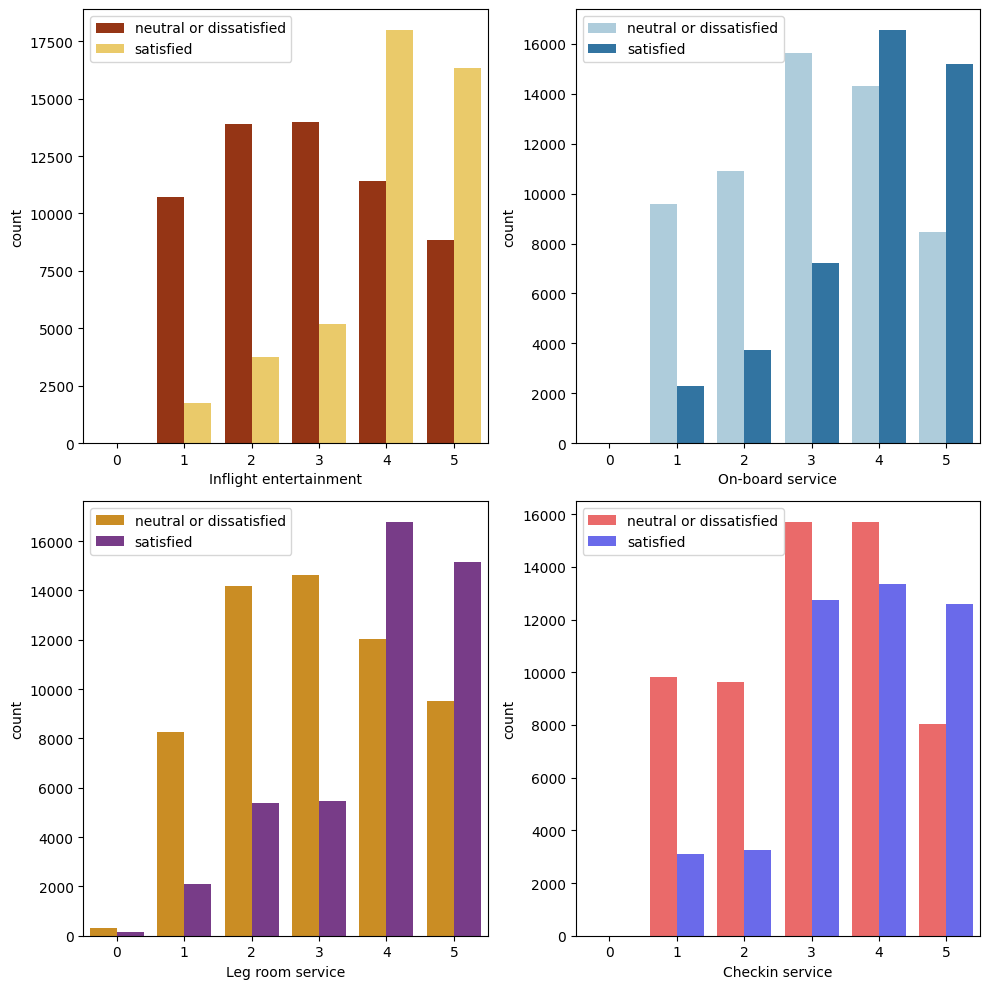

In [113]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x="Inflight entertainment" , hue="satisfaction", palette="afmhot")
plt.legend()

plt.subplot(2,2,2)
sns.countplot(data=df, x="On-board service" , hue="satisfaction", palette="Paired")
plt.legend()

plt.subplot(2,2,3)
sns.countplot(data=df, x="Leg room service" , hue="satisfaction", palette="CMRmap_r")
plt.legend()

plt.subplot(2,2,4)
sns.countplot(data=df, x="Checkin service" , hue="satisfaction", palette="seismic_r")
plt.legend()
plt.tight_layout()
plt.show()

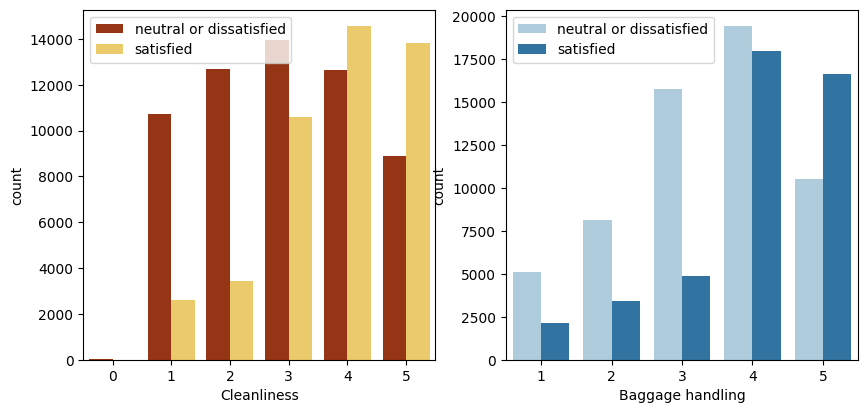

In [114]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(data=df, x="Cleanliness" , hue="satisfaction", palette="afmhot")
plt.legend()

plt.subplot(2,2,2)
sns.countplot(data=df, x="Baggage handling" , hue="satisfaction", palette="Paired")
plt.legend()

Terdapat beberapa aspek yang perlu ditingkatkan dalam pelayanan maskapai, diantaranya:
- Layanan wifi dalam pesawat
- Waktu keberangkatan/kedatangan yang nyaman
- Booking online
- Lokasi gate
- Makanan dan minuman
- Boarding online
- Kenyamanan tempat duduk
- Hiburan dalam pesawat
- Layanan on-board, check-in, dan layanan leg room
- Penanganan bagasi

## Conclusion and Recommendation

Dari analisis yang telah dilakukan, dapat disimpulkan hal berikut:
* Secara umum, nilai penumpang yang menyatakan puas terhadap layanan maskapai sebesar 43,3%.
* Penumpang dengan jenis penerbangan pribadi cenderung memberikan nilai netral atau tidak puas terhadap pelayanan yang telah diberikan maskapai, sebesar 89,83%.
* Persentase penumpang yang memberikan nilai netral atau tidak puas yang menggunakan kelas ekonomi sangat tinggi sebesar 81,39%.Mayoritas pengguna adalah perempuan dan persentase kepuasan jasa airline relatif sama antara laki-laki dan perempuan.

**`Rekomendasi`**

1. Pihak maskapai dapat meningkatkan kualitas penerbangan Eco dan Eco Plus dengan mengacu pada kelas bisnis yang dinilai baik, dalam fasilitas hiburan dalam pesawat, kenyamanan kursi, layanan check-in, dan makanan dan minuman. Hal ini dikarenakan konsumen di kelas Eco dan Eco Plus yang cukup besar.
2. Strategi marketing maskapai dapat ditingkatkan dengan promosi ke target pasar kelompok usia young adult dan retired, serta mengakomodasi kenyamanan kelompok usia <18 tahun (children). 
3. Maskapai dapat menciptakan aplikasi yang menyediakan fitur kemudahan booking dan online boarding bagi pengguna, serta memberikan akses menuju pesawat (lokasi gate) yang lebih dekat bagi penumpang.